<a href="https://colab.research.google.com/github/sanuli21/telco-churn-project/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
folders = ["notebooks", "data", "reports", "models"]
for folder in folders:
  if not os.path.exists(folder):
    os.makedirs(folder)
    print(f"{folder} created")
  else:
    print(f"Folder already exists: {folder}")
print("Folders ready.")

notebooks created
data created
reports created
models created
Folders ready.


In [3]:
from google.colab import files
upload = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
import shutil
#moving uploaded CSV to data folder
shutil.move("telco.csv", "data/telco.csv")
print("Dataset moved to data/folder")

Dataset moved to data/folder


In [5]:
#importing basic libraries
import pandas as pd
import numpy as np

#to ignore warnings to keep notebook clean
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported.")

Libraries imported.


In [6]:
#loading dataset
data_path = "data/telco.csv"
df = pd.read_csv(data_path)

print("Dataset loaded")
print("\nFirst 5 rows: \n", df.head())


Dataset loaded

First 5 rows: 
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Stre

In [7]:
# Basic dataset info
print("Dataset Shape: ", df.shape)
df.info()
df.describe()

Dataset Shape:  (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#checking for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
empty_totalcharges = df[df['TotalCharges'].str.strip() == '']
print("No of empty totalCharges: ", len(empty_totalcharges))
print(empty_totalcharges)

No of empty totalCharges:  11
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             

In [10]:
#Filling the 11 TotalCharges which has empty strings with 0 as they become NaNs when converted to Numeric if not handled

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)
print("Missing values now: ", df['TotalCharges'].isnull().sum())


Missing values now:  0


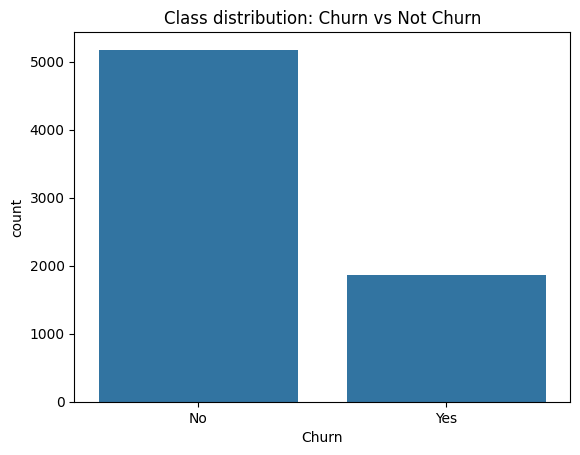

,proportion
Churn,
No,73.463013
Yes,26.536987


In [11]:
# Check distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title("Class distribution: Churn vs Not Churn")
plt.show()

df['Churn'].value_counts(normalize=True) * 100


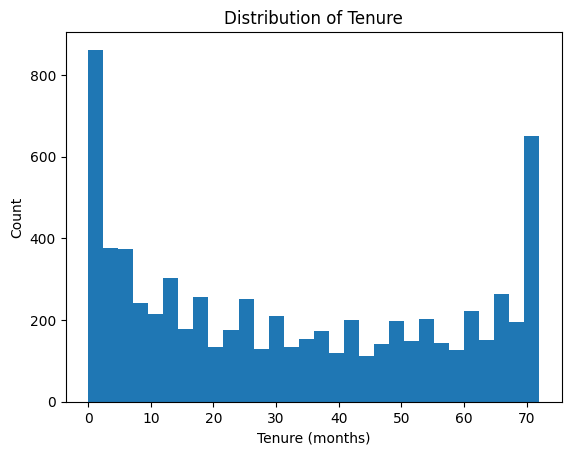

In [12]:
#visulaize tenure distibution
plt.hist(df['tenure'], bins=30) #using 30 so it gives a detailed shape of the distribution
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()


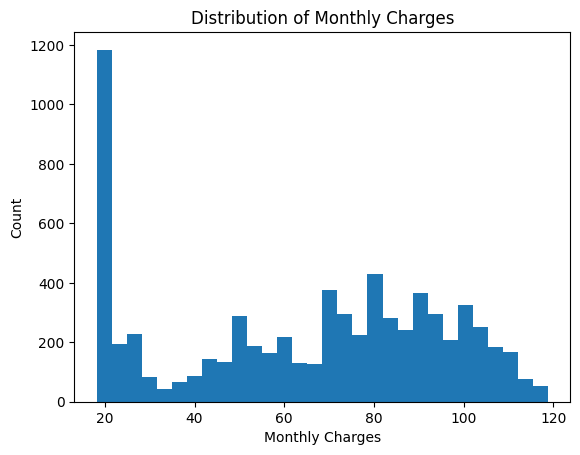

In [13]:
#monthly charges distribution

plt.hist(df['MonthlyCharges'], bins=30)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

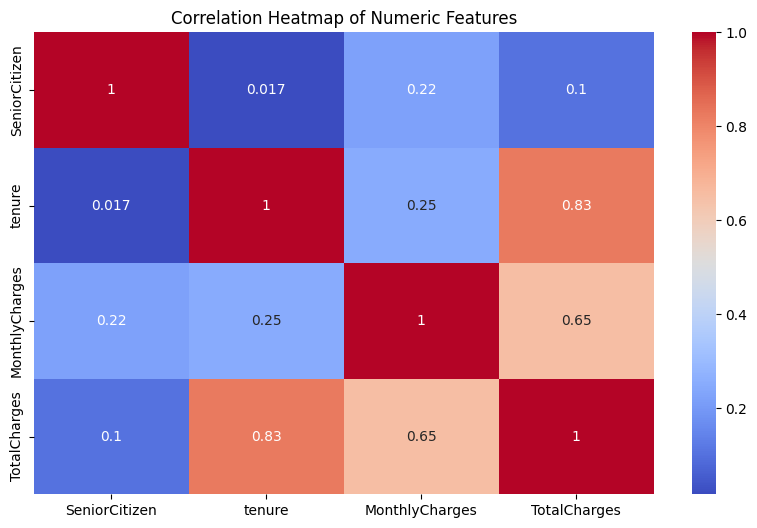

In [14]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

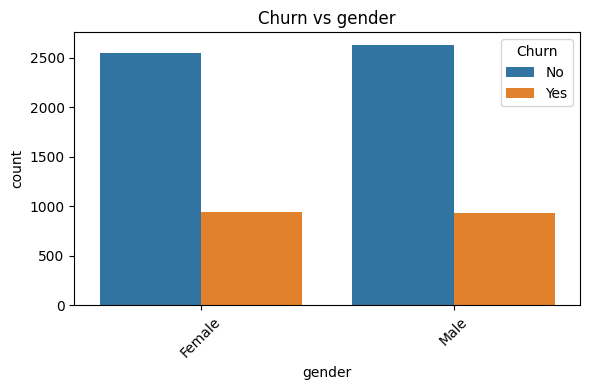

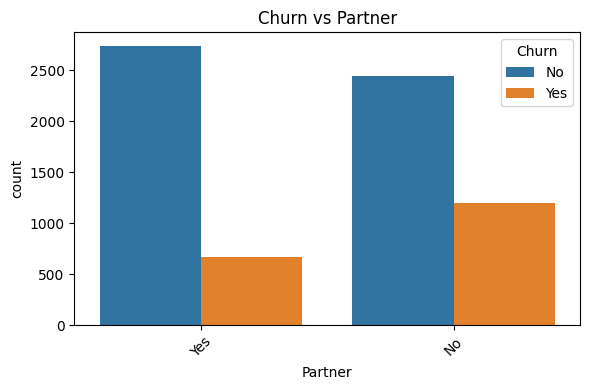

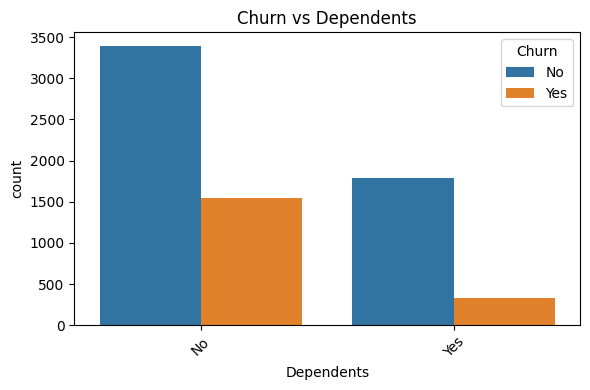

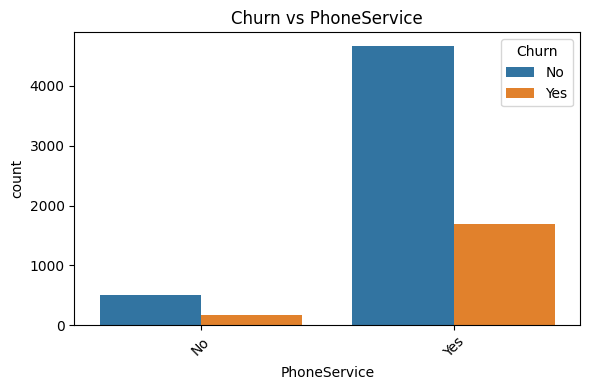

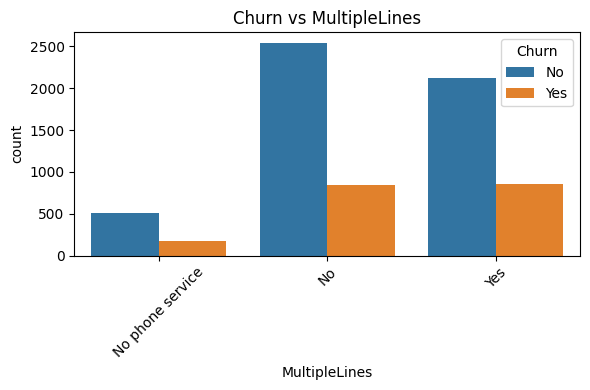

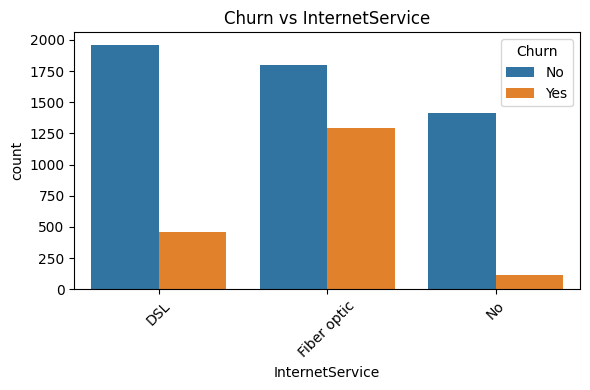

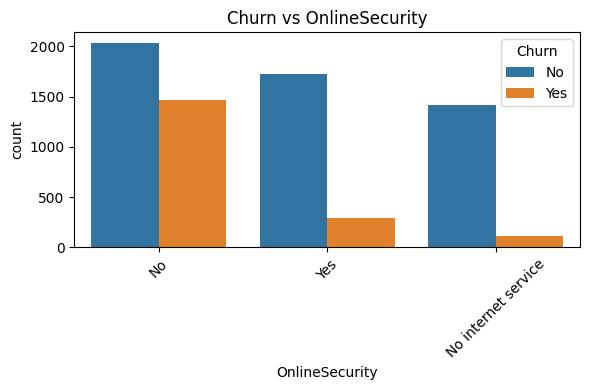

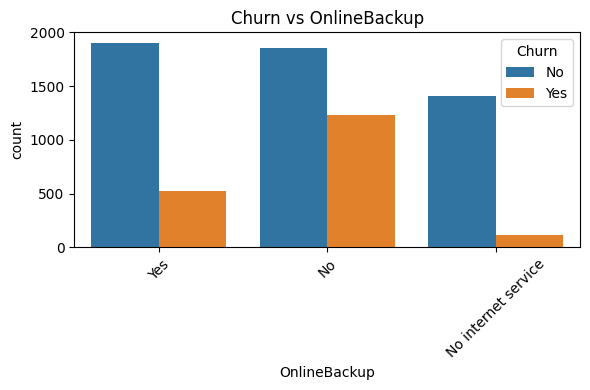

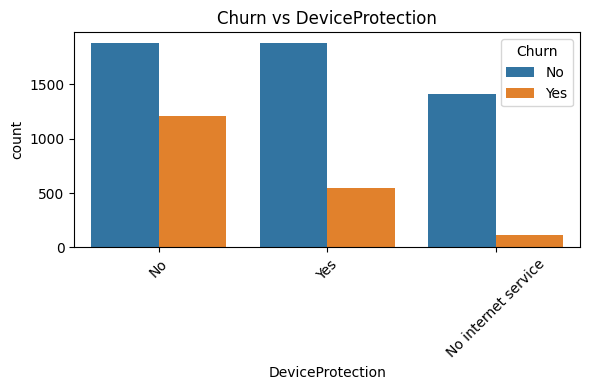

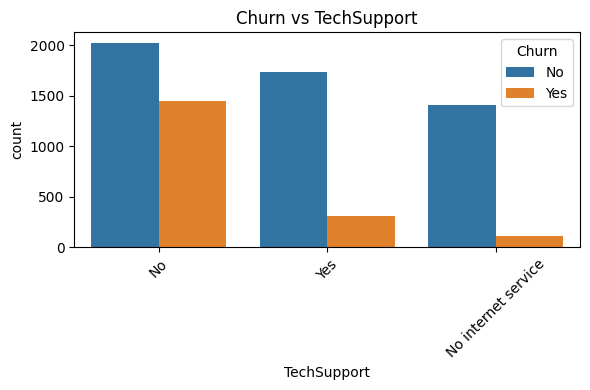

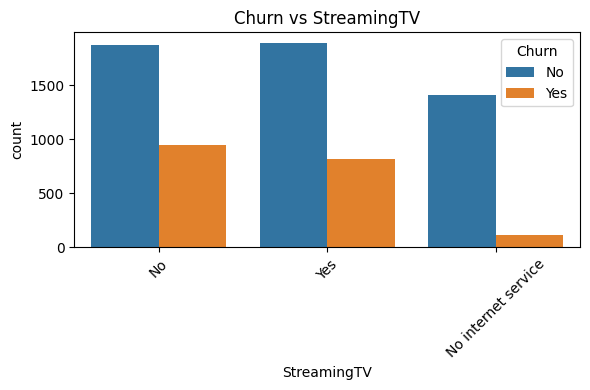

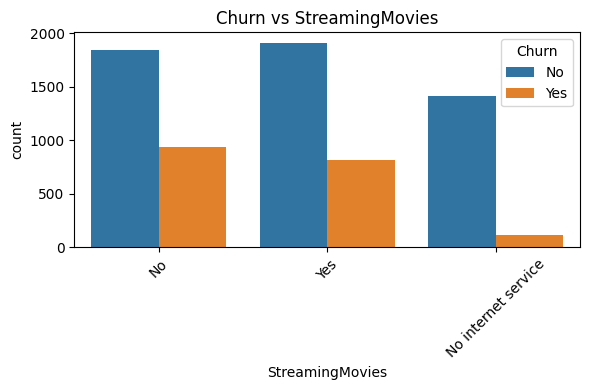

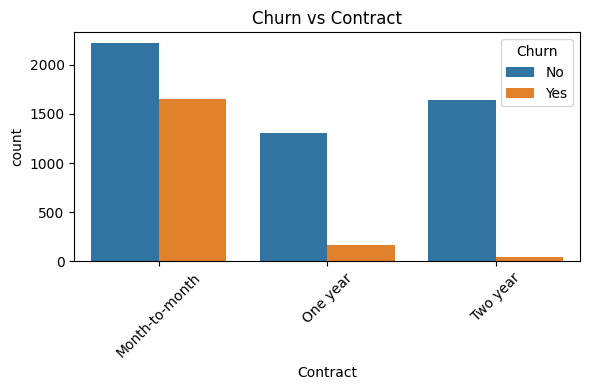

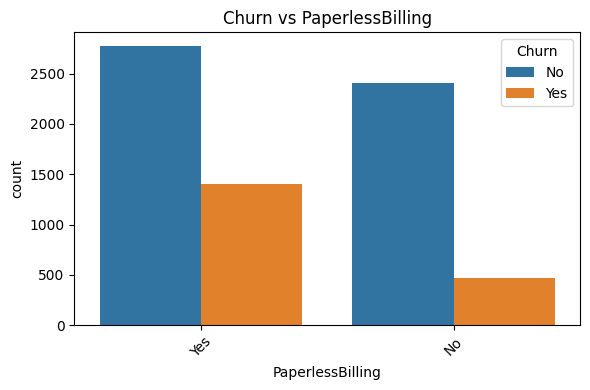

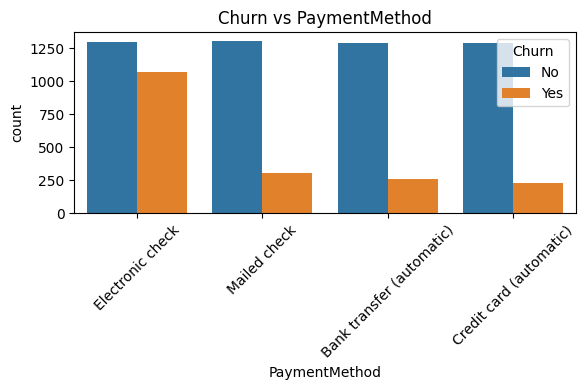

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns #picking all columns that are strings

for col in categorical_cols: #creating one chart per categorical fetaure
  if col not in ['customerID', 'Churn']: #as CustomerID is unique for every row
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"Churn vs {col}")
    plt.xticks(rotation=45) #to rotate labels if long
    plt.tight_layout()
    plt.show()

# EDA Insights Summary

#1. Dataset Overview
- 7,043 rows, 21 features.
- No severe missing values, except in **TotalCharges**, which was cleaned.

#2. Class Distribution
- Churn = 26.5%
- Not churn = 73.5%
- Dataset is imbalanced.

#3. Numerical Insights
- Customers with **high MonthlyCharges **tend to churn more.
- Customers with **low tenure** have significantly higher churn.

#4. Categorical Insights
- **Month-to-Month** contract - highest churn.
- **Electronic Check** users - high churn.
- **Fiber optic** internet users - higher churn
- Customers with **no partner / no dependants** - more churn.

#5. Key relationships
- **Contract type** is the strongest churn predictor.
- **Payment method**, **Internet service**, and tech-related add-ons also influence churn.

In [24]:
# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

#splitting features and traget
X = df.drop('Churn', axis = 1) #all features used to predict churn
y = df['Churn']

#encoding target variable(converting yes no of churn column to 1 and 0)
label_y = LabelEncoder()
y = label_y.fit_transform(y)

#identify categorical and numeric columns as categorical columns need one hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'customerID' in categorical_cols:
  categorical_cols.remove('customerID') #as it's just an idnetifier not a feature

#OneHotEncoder converts each category into a new column
preprocessor = ColumnTransformer( #ColumnTransformer apply OneHotEncoder only to categorical features and keep numeric features as they are
    transformers = [
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

X_encoded = preprocessor.fit_transform(X)

#convert to dataframe
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_cols = numeric_cols + list(encoded_cat_cols)
df_encoded = pd.DataFrame(X_encoded, columns=all_cols)

print("Categorical columns encoded successfully.")
df_encoded.head()

Categorical columns encoded successfully.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [25]:
# scale numeric features as ML models work better when all numeric features are on a similar scale

from sklearn.preprocessing import StandardScaler

#select numeric columns(all are numeric now)
numeric_cols_scaled = df_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df_encoded[numeric_cols_scaled] = scaler.fit_transform(df_encoded[numeric_cols_scaled])

print("Numeric features scaled.")

df_encoded.head()


Numeric features scaled.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.992611,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,-0.439916,0.066327,-0.259629,-0.172165,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-0.439916,-1.236724,-0.362660,-0.958066,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,-0.439916,0.514251,-0.746535,-0.193672,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-0.439916,-1.236724,0.197365,-0.938874,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807


In [32]:
# train-test split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, y, test_size=0.2, random_state=42, stratify=y
) # we use startify=y so that churn ratio stays the same in both sets

print("Train-test split done.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Train-test split done.
Training set shape: (5634, 30)
Testing set shape: (1409, 30)
